<a href="https://colab.research.google.com/github/trnq-eu/ml-zoomcamp-2024/blob/main/02_ml_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Regression

## 2.2 Data preparation

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2024-09-14 03:29:43--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2024-09-14 03:29:43 (22.1 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [ ]:
import pandas as pd
import numpy as np

data_path = '/content/data.csv'
df = pd.read_csv(data_path)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [ ]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [ ]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
# normalizzo i valori di tutte le colonne che contengono stringhe

for col in strings:
  df[col] = df[col].str.lower().str.replace(" ","_")

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Exploratory Data Analysis

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribuzione del prezzo

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

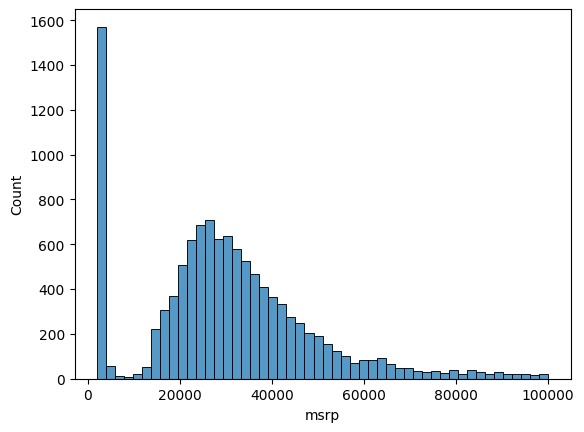

In [ ]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50
             )

Logaritmo del prezzo

In [ ]:
np.log1p([0,1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [ ]:
price_logs = np.log1p(df.msrp)

Normal distribution, funzionano meglio delle distribuzioni long tail, a coda lunga

<Axes: xlabel='msrp', ylabel='Count'>

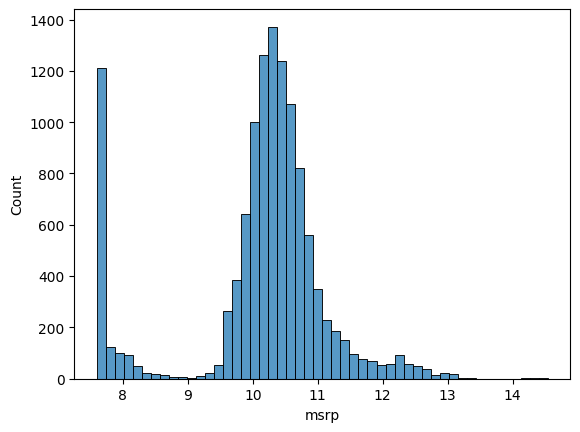

In [ ]:
sns.histplot(price_logs, bins=50)

### Missing values

In [ ]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


## 2.4 Setting up the validation framework

In [ ]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [ ]:
n, n_val + n_test +n_train

(11914, 11914)

In [ ]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [ ]:
df.iloc[[0,1,2]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


In [ ]:
df.iloc[10:20]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
11,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
12,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,44400
13,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,19,3916,37200
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
15,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,25,18,3916,48250
16,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,43550
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000


In [ ]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [ ]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,porsche,cayenne,2016,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,157300
2378,porsche,cayenne,2016,diesel,240.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,diesel",midsize,4dr_suv,29,20,1715,62300
2379,porsche,cayenne,2017,premium_unleaded_(required),520.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,21,14,1715,116500
2380,porsche,cayenne,2017,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,24,18,1715,59600


In [ ]:
# sequenza casuale di indici
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [ ]:
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val+n_test]]
df_train = df.iloc[idx[n_val+n_test:]]

In [ ]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8597,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,16395
6408,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,24145
11241,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,18000
569,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,15990
1659,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,43585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [ ]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# array numpy degli obiettivi a cui abbiamo applicato il logaritmo
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [ ]:
# rimuoviamo l'obiettivo dal dataset
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [ ]:
len(y_train)

7150

## 2.5 Simple linear regression

In [ ]:
df_train.iloc[10]

,10
make,chevrolet
model,trailblazer_ext
year,2004
engine_fuel_type,regular_unleaded
engine_hp,275.0
engine_cylinders,6.0
transmission_type,automatic
driven_wheels,rear_wheel_drive
number_of_doors,4.0
market_category,NaN


In [ ]:
xi = [275,13,1385]

In [ ]:
def g(xi):
  # do something
  return 10000

In [ ]:
g(xi)

10000

Formula della regressione lineare:

$g(x_i) = w_0 +\sum_{j=0}^{n-1}.w_j.x_{ij} $

In [ ]:
w0 = 7.17
w = [0.01,0.04,0.002]

In [ ]:
def linear_regression(xi):
  n = len(xi)

  pred = w0

  for j in range(n):
    pred = pred + w[j] * xi[j]

  return pred

In [ ]:
linear_regression(xi)

13.209999999999999

In [ ]:
np.exp(13.21) - 1

545794.6951524477

## 2.6 Linear regression vector form

In [ ]:
w_new = [w0] + w
w_new


[7.17, 0.01, 0.04, 0.002]

In [ ]:
def dot(xi, w):
  xi = [1]+xi

  return w0 + dot(xi, w)

In [ ]:
linear_regression(xi)

13.209999999999999

In [ ]:
xi = [275,13,1385]
w0 = 7.17
w = [0.01,0.04,0.002]

In [ ]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2385]
x10 = [1, 448, 11, 85]

X = [x1, x2, x10]

X = np.array(X)

X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2385],
       [   1,  448,   11,   85]])

In [ ]:
def linear_regression(X):
  return X.dot(w_new)


## 2.7 Training a linear regression model

In [ ]:
def train_linear_regression(X, y):
  pass

In [ ]:
X = [
[148, 24, 1385],
[132, 25, 2385],
[448, 11, 85],
[148, 24, 885],
[132, 45, 2385],
[428, 71, 185],
[177, 24, 985],
[332, 35, 1385],
[448, 11, 85],
]


X = np.array(X)
X


array([[ 148,   24, 1385],
       [ 132,   25, 2385],
       [ 448,   11,   85],
       [ 148,   24,  885],
       [ 132,   45, 2385],
       [ 428,   71,  185],
       [ 177,   24,  985],
       [ 332,   35, 1385],
       [ 448,   11,   85]])

In [ ]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)

In [ ]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00, -3.09045477e-15, -8.63498474e-17],
       [ 3.64228667e-17,  1.00000000e+00,  2.87361221e-18],
       [ 8.53802580e-16,  2.43413806e-15,  1.00000000e+00]])

In [ ]:
ones = np.ones(X.shape[0])

In [ ]:
np.column_stack([ones, X])

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.385e+03],
       [1.000e+00, 4.480e+02, 1.100e+01, 8.500e+01],
       [1.000e+00, 1.480e+02, 2.400e+01, 8.850e+02],
       [1.000e+00, 1.320e+02, 4.500e+01, 2.385e+03],
       [1.000e+00, 4.280e+02, 7.100e+01, 1.850e+02],
       [1.000e+00, 1.770e+02, 2.400e+01, 9.850e+02],
       [1.000e+00, 3.320e+02, 3.500e+01, 1.385e+03],
       [1.000e+00, 4.480e+02, 1.100e+01, 8.500e+01]])

In [ ]:
y = [100, 200, 150, 100, 200, 150, 100, 200, 150]

In [ ]:
w_full = XTX_inv.dot(X.T).dot(y)

In [ ]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [ ]:
train_linear_regression(X, y)

(-51.01657749654535, array([0.42927503, 0.04883672, 0.07872075]))

## 2.8 Car price baseline model

In [ ]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity' ]

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,162.0,4.0,26,19,1720
1,175.0,4.0,36,26,640
2,132.0,4.0,35,27,1439
3,101.0,4.0,33,27,819
4,302.0,8.0,16,11,61
...,...,...,...,...,...
7145,200.0,6.0,18,13,1385
7146,160.0,4.0,33,29,640
7147,250.0,6.0,22,15,1851
7148,174.0,4.0,42,31,2202


In [ ]:
X_train = df_train[base].values
X_train

array([[ 162.,    4.,   26.,   19., 1720.],
       [ 175.,    4.,   36.,   26.,  640.],
       [ 132.,    4.,   35.,   27., 1439.],
       ...,
       [ 250.,    6.,   22.,   15., 1851.],
       [ 174.,    4.,   42.,   31., 2202.],
       [ 256.,    6.,   27.,   20.,  640.]])

In [ ]:
X_train = df_train[base].fillna(0).values

In [ ]:
w0, w = train_linear_regression(X_train, y_train)

In [ ]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

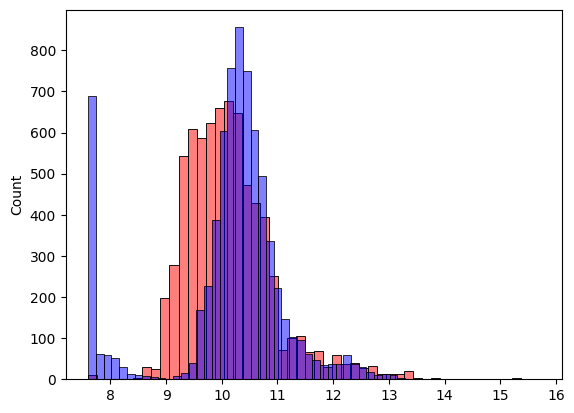

In [ ]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50),
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## 2.9 RMSE

In [ ]:
def rmse(y, y_pred):
  error = y - y_pred
  se = error ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

0.745130516822012

## 2.10 Validating the model

In [ ]:
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [ ]:
def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
#train
X_train = prepare_X(df_train)
W0, w = train_linear_regression(X_train, y_train)

#validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7419381478118969

## 2.11 Simple feature engineering

In [ ]:
df_train.year.unique()

array([2008, 2016, 2017, 2005, 2007, 1992, 1995, 2004, 1997, 2010, 2003,
       2014, 2015, 2013, 1996, 2009, 2012, 1998, 1990, 2011, 1999, 1993,
       1991, 2002, 2006, 2000, 1994, 2001])

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5138817849020834
validation 0.5222394405268986


<Axes: ylabel='Count'>

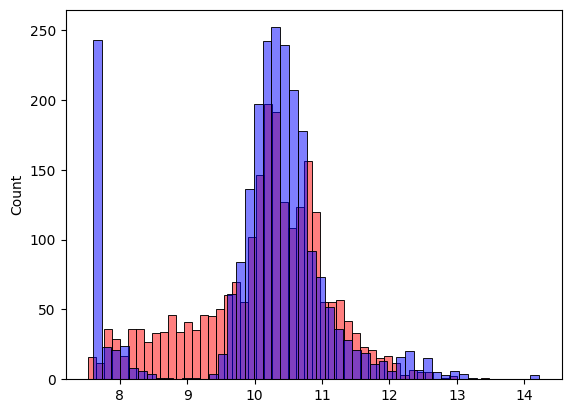

In [ ]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50),
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

## 2.12 Categorical variables

In [ ]:
for v in [2,3,4]:
  df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')





In [ ]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,0,0,1
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,0,0,1
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,0,1,0
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,1,0,0
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,0,1,0
7146,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,0,0,1
7147,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,0,0,1
7148,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,0,0,1


In [ ]:
def prepare_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity' ]

    df = df.copy() # Create a copy of the dataframe to avoid modifying the original
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
      df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int') # Modify the local copy df
      features.append('num_doors_%s' % v)


    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5119486369713488
validation 0.5210137656825129


In [ ]:
makes = list(df.make.value_counts().head().index)

In [ ]:
def prepare_X(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity' ]

    df = df.copy() # Create a copy of the dataframe to avoid modifying the original
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
      df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int') # Modify the local copy df
      features.append('num_doors_%s' % v)

    for v in makes:
      df['make_%s' % v] = (df.make == v).astype('int')
      features.append('make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5100789886279478

In [ ]:
df.dtypes


,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [ ]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'
]

In [ ]:
categories = {}

for c in categorical_variables:
  categories[c] = list(df[c].value_counts().head().index)



In [ ]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity' ]


In [ ]:
def prepare_X(df):
    # base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity' ]

    df = df.copy() # Create a copy of the dataframe to avoid modifying the original
    # features = base.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
      df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int') # Modify the local copy df
      features.append('num_doors_%s' % v)

    for name, values in categories.items():
      for value in values:
        df['%s_%s' % (name,value)] = (df[name] == value).astype('int')
        features.append('%s_%s' % (name,value))


    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

478.68177331226934

In [ ]:
w

array([ 3.64440214e-01, -1.02685613e+01,  8.56293521e+00, -4.23114652e+00,
        4.62021851e-03,  1.70643662e+00,  1.65836524e+04,  1.65984224e+04,
        1.65614842e+04, -4.92548764e-02,  3.52443864e+00, -1.19531220e+01,
       -1.01660007e+00, -2.47379005e+01, -4.70590531e+02, -4.82576206e+02,
       -4.97468266e+02, -5.50012621e+02, -3.56964852e+02,  1.44947915e+16,
        1.44947915e+16,  1.44947915e+16,  1.44947915e+16,  1.44947915e+16,
       -6.38395514e+15, -6.38395514e+15, -6.38395514e+15, -6.38395514e+15,
        9.71710813e+00,  1.42225916e+01, -1.50619780e+00,  6.97036517e-01,
        3.76620870e+01, -2.66713029e+00,  4.24564081e+00,  1.20417616e+01,
       -5.23253992e-02,  5.54593778e-02,  1.74932828e-01,  3.02782777e-01,
       -1.37794157e-01])

## 2.13 Regularization

In [ ]:
import numpy as np

vettore = np.arange(1,10, 3)
vettore


array([1, 4, 7])

In [ ]:
import random

# matrice = lambda: [np.arange(1,10, 3) for _ in range 9]
matrice = [[random.randint(1,9) for _ in range(3)] for i in range(6) ]
matrice

[[4, 5, 3], [3, 5, 4], [3, 3, 9], [3, 5, 2], [4, 6, 4], [4, 3, 5]]

In [ ]:
X = np.array(matrice)
X

array([[4, 5, 3],
       [3, 5, 4],
       [3, 3, 9],
       [3, 5, 2],
       [4, 6, 4],
       [4, 3, 5]])

In [ ]:
y = [1,2,3,1,2,3]

In [ ]:
XTX = X.T.dot(X)

XTX

array([[ 75,  95,  93],
       [ 95, 129, 111],
       [ 93, 111, 151]])

In [ ]:
XTX_INV = np.linalg.inv(XTX)

In [ ]:
XTX_INV.dot(X.T).dot(y)

array([ 0.40863922, -0.15179477,  0.27712432])

In [ ]:
XTX = [
    [1,2,2],
    [2,1,1.000001],
    [2,1.000001,1]
]

XTX = np.array(XTX)

In [ ]:
np.linalg.inv(XTX)

array([[-3.33333556e-01,  3.33333389e-01,  3.33333389e-01],
       [ 3.33333389e-01, -5.00000083e+05,  4.99999917e+05],
       [ 3.33333389e-01,  4.99999917e+05, -5.00000083e+05]])

In [ ]:
XTX = XTX + 0.01 * np.eye(3)

In [ ]:
np.linalg.inv(XTX)

array([[ -0.33668928,   0.33501404,   0.33501404],
       [  0.33501404,  49.92040945, -50.08959155],
       [  0.33501404, -50.08959155,  49.92040945]])

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.00001)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4687170580913014

## 2.14 Tuning the model


In [ ]:
for r in [0.0, 0.000001, 0.0001, 0.1, 1, 10]:
  X_train = prepare_X(df_train)
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

  X_val = prepare_X(df_val)
  y_pred = w_0 + X_val.dot(w)

  score = rmse(y_val, y_pred)

  print(r, w0, score)

0.0 7.963556475096341 478.68177331226934
1e-06 7.963556475096341 0.4687169109481933
0.0001 7.963556475096341 0.46871705254757146
0.1 7.963556475096341 0.4687526504042968
1 7.963556475096341 0.4701357829153136
10 7.963556475096341 0.48175491491846306


In [ ]:
r = 0.001
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score


0.46871686303133375

## 2.15 Using the model


In [ ]:
df_full_train = pd.concat([df_train, df_val])

In [ ]:
df_full_train.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,0.0,0.0,1.0
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,0.0,0.0,1.0
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,0.0,1.0,0.0
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,1.0,0.0,0.0
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,infiniti,q50,2015,premium_unleaded_(recommended),328.0,6.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",midsize,sedan,27,19,190,NaN,NaN,NaN
9528,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,22,17,1385,NaN,NaN,NaN
9529,ford,fiesta,2016,regular_unleaded,197.0,4.0,manual,front_wheel_drive,4.0,"hatchback,factory_tuner,performance",compact,4dr_hatchback,32,26,5657,NaN,NaN,NaN
9530,mercedes-benz,e-class,2016,premium_unleaded_(required),302.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,28,20,617,NaN,NaN,NaN


In [ ]:
X_full_train = prepare_X(df_full_train)

In [ ]:
X_full_train

array([[162.,   4.,  26., ...,   0.,   0.,   0.],
       [175.,   4.,  36., ...,   0.,   0.,   0.],
       [132.,   4.,  35., ...,   0.,   0.,   0.],
       ...,
       [197.,   4.,  32., ...,   0.,   0.,   1.],
       [302.,   6.,  28., ...,   0.,   0.,   0.],
       [210.,   6.,  20., ...,   0.,   0.,   0.]])

In [ ]:
y_full_train = np.concatenate([y_train, y_val])

In [ ]:
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [ ]:
w

array([ 1.58188101e-03,  1.16747157e-01, -6.84023547e-03, -5.82599592e-03,
       -5.69435280e-05, -9.55822855e-02, -7.42402697e-01, -8.56560148e-01,
       -6.01289805e-01, -4.19678124e-02,  2.15418111e-01, -2.56302260e-03,
       -8.85582684e-02, -9.20751798e-02, -4.55974072e-01,  9.17937777e-02,
       -3.11753530e-01, -5.42846563e-01, -6.28217454e-02,  1.07662037e+00,
        8.77363261e-01,  1.14022074e+00,  2.72305269e+00,  4.93525396e-01,
        1.63423650e+00,  1.51893373e+00,  1.61946019e+00,  1.53894987e+00,
       -9.79876818e-02,  4.48085982e-02, -3.80637753e-02, -1.69804843e-03,
       -2.68516030e-02,  2.18858897e+00,  2.06930488e+00,  2.05370690e+00,
       -3.81749937e-02,  5.13487268e-02,  1.81786907e-01,  3.25308259e-01,
       -1.36989420e-01])

In [ ]:
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

0.46424580614294203

In [ ]:
car = df_test.iloc[20]
car

,20
make,acura
model,ilx
year,2017
engine_fuel_type,premium_unleaded_(recommended)
engine_hp,201.0
engine_cylinders,4.0
transmission_type,automated_manual
driven_wheels,front_wheel_drive
number_of_doors,4.0
market_category,luxury


In [ ]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
20,acura,ilx,2017,premium_unleaded_(recommended),201.0,4.0,automated_manual,front_wheel_drive,4.0,luxury,compact,sedan,35,25,204


In [ ]:
X_small = prepare_X(df_small)

In [ ]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

12.32559266469632

In [ ]:
np.expm1(y_pred)

225390.1609113749

In [ ]:
np.expm1(y_test[20])

29289.999999999978

## 2.18 Homework 2023

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2024-09-14 15:55:36--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.05s   

2024-09-14 15:55:37 (29.9 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
import pandas as pd

hdf = pd.read_csv('/content/housing.csv')
hdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
for col in hdf.columns:
  print(col)
  print(hdf[col].unique()[:5])
  print(hdf[col].nunique())
  print()


longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

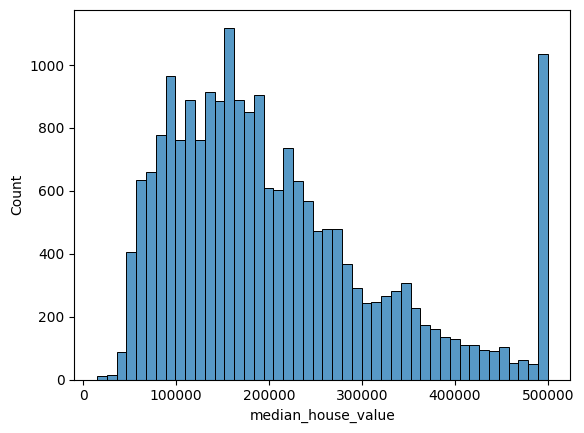

In [ ]:
sns.histplot(hdf.median_house_value)

In [ ]:
fdf = hdf[hdf['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
len(fdf)

15687

In [ ]:
fdf = fdf[[
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

fdf.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [ ]:
fdf.isnull().sum()

,0
latitude,0
longitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,157
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
fdf.population.median()

1195.0

**Prepare and split the dataset**

Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [ ]:
import numpy as np

seed = 42
n = len(fdf)

idx = np.arange(n)
np.random.shuffle(idx)
idx

array([12161, 11961, 10535, ..., 11880, 11253, 15004])

In [ ]:
n_val = int(n * 0.2)
n_test = int(n*0.2)
n_train = n - n_val -n_test

n_val, n_test, n_train

(3137, 3137, 9413)

In [ ]:
len(fdf), len(hdf)

(15687, 20640)

In [ ]:
fdf_val = fdf.iloc[idx[:n_val]]
fdf_test = fdf.iloc[idx[n_val:n_val+n_test]]
fdf_train = fdf.iloc[idx[n_val+n_test:]]

In [ ]:
fdf_train = fdf_train.reset_index(drop=True)
fdf_val = fdf_val.reset_index(drop=True)
fdf_test = fdf_test.reset_index(drop=True)

In [ ]:
fdf_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5506,33.98,-118.42,3.0,475.0,155.0,236.0,153.0,3.6667,450000.0
9558,37.43,-120.57,39.0,2235.0,412.0,1268.0,402.0,2.6758,74600.0
9438,37.43,-119.98,12.0,2776.0,592.0,1236.0,489.0,2.5551,105000.0
4678,34.08,-118.34,52.0,1721.0,195.0,688.0,196.0,15.0001,500001.0
13291,34.07,-117.66,33.0,2081.0,409.0,1008.0,375.0,2.5870,138100.0


In [ ]:
y_train = np.log1p(fdf_train.median_house_value.values)
y_val = np.log1p(fdf_val.median_house_value.values)
y_test = np.log1p(fdf_test.median_house_value.values)

y_train, y_val, y_test

(array([13.01700508, 11.21990919, 11.56172515, ..., 11.34688269,
        11.8277435 , 11.5337178 ]),
 array([11.94341484, 12.98562915, 11.1605413 , ..., 11.3794055 ,
        12.04179334, 12.26670197]),
 array([11.4700284 , 12.69863552, 12.33138725, ..., 12.16525586,
        12.68757553, 11.91839724]))

In [ ]:
median_fdf_total_bedrooms = fdf_train.total_bedrooms.mean()
median_fdf_total_bedrooms

542.5020716031021

In [ ]:
# riempimento dei valori nulli con il valore medio

fdf_train['total_bedrooms'] = fdf_train.total_bedrooms.fillna(median_fdf_total_bedrooms)
fdf_val['total_bedrooms'] = fdf_val.total_bedrooms.fillna(median_fdf_total_bedrooms)
fdf_test['total_bedrooms'] = fdf_test.total_bedrooms.fillna(median_fdf_total_bedrooms)


In [ ]:
# rimuoviamo l'obiettivo dal dataset
del fdf_train['median_house_value']
del fdf_val['median_house_value']
del fdf_test['median_house_value']

In [ ]:
X_train = fdf_train.values

In [ ]:
X_train

array([[ 3.4280e+01, -1.1870e+02,  2.7000e+01, ...,  4.6700e+02,
         1.4400e+02,  3.7188e+00],
       [ 3.8020e+01, -1.2043e+02,  1.5000e+01, ...,  6.5500e+02,
         2.5100e+02,  3.6875e+00],
       [ 3.8280e+01, -1.2203e+02,  1.5000e+01, ...,  2.4180e+03,
         7.7800e+02,  4.4882e+00],
       ...,
       [ 3.7340e+01, -1.2184e+02,  2.7000e+01, ...,  3.0330e+03,
         5.2600e+02,  4.2500e+00],
       [ 3.5380e+01, -1.1902e+02,  5.2000e+01, ...,  3.6000e+01,
         3.1000e+01,  8.0540e-01],
       [ 3.3920e+01, -1.1829e+02,  4.0000e+01, ...,  1.6160e+03,
         4.3300e+02,  2.8750e+00]])

In [ ]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [ ]:
train_linear_regression(X_train, y_train)

(-10.088648835207405,
 array([-2.70746789e-01, -2.59283163e-01,  1.74718987e-03, -3.46500738e-05,
         4.16733861e-04, -1.41231177e-04,  2.26959130e-04,  1.85157799e-01]))

In [ ]:
def rmse(y, y_pred):
  error = y - y_pred
  se = error ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [ ]:
w_0, w = train_linear_regression(X_train, y_train)

X_val = fdf_val.values
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.3510900535793297

Riproviamo questa volta riempiendo i valori vuoti con 0

In [ ]:
fdf_val = fdf.iloc[idx[:n_val]]
fdf_test = fdf.iloc[idx[n_val:n_val+n_test]]
fdf_train = fdf.iloc[idx[n_val+n_test:]]


fdf_train = fdf_train.reset_index(drop=True)
fdf_val = fdf_val.reset_index(drop=True)
fdf_test = fdf_test.reset_index(drop=True)

del fdf_train['median_house_value']
del fdf_val['median_house_value']
del fdf_test['median_house_value']


fdf_train['total_bedrooms'] = fdf_train.total_bedrooms.fillna(0)
fdf_val['total_bedrooms'] = fdf_val.total_bedrooms.fillna(0)
fdf_test['total_bedrooms'] = fdf_test.total_bedrooms.fillna(0)

In [ ]:
# addestramento
X_train = fdf_train.values
w_0, w = train_linear_regression(X_train, y_train)
X_val = fdf_val.values
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)



0.34116302137395843

Addestramento con regolarizzazione

In [ ]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [ ]:
def train_linear_regression_reg(X, y, r=0.01):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [ ]:
for r in r_values:
  X_train = fdf_train.values
  w_0, w = train_linear_regression_reg(X_train, y_train, r = r)
  X_val = fdf_val.values
  y_pred = w_0 + X_val.dot(w)

  result = rmse(y_val, y_pred)
  print(f"r={r} | RMSE = {round(result, 2)}\n")

r=0 | RMSE = 0.34

r=1e-06 | RMSE = 0.34

r=0.0001 | RMSE = 0.34

r=0.001 | RMSE = 0.34

r=0.01 | RMSE = 0.34

r=0.1 | RMSE = 0.34

r=1 | RMSE = 0.34

r=5 | RMSE = 0.34

r=10 | RMSE = 0.34



In [ ]:
for r in [0.0, 0.000001, 0.0001, 0.1, 1, 10]:
  X_train = fdf_train
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

  X_val = fdf_val
  y_pred = w_0 + X_val.dot(w)

  score = rmse(y_val, y_pred)

  print(r, w_0, round(score,2))

0.0 -10.326853923511857 0.34
1e-06 -10.326832148243147 0.34
0.0001 -10.32467686371968 0.34
0.1 -8.52843899283111 0.34
1 -3.320653152658433 0.34
10 -0.4648496841489048 0.34


In [ ]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  n = len(fdf)

  idx = np.arange(n)
  np.random.shuffle(idx)

  n_val = int(n * 0.2)
  n_test = int(n*0.2)
  n_train = n - n_val - n_test

  fdf_val = fdf.iloc[idx[:n_val]]
  fdf_test = fdf.iloc[idx[n_val:n_val+n_test]]
  fdf_train = fdf.iloc[idx[n_val+n_test:]]

  fdf_train = fdf_train.reset_index(drop=True)
  fdf_val = fdf_val.reset_index(drop=True)
  fdf_test = fdf_test.reset_index(drop=True)

  y_train = np.log1p(fdf_train.median_house_value.values)
  y_val = np.log1p(fdf_val.median_house_value.values)
  y_test = np.log1p(fdf_test.median_house_value.values)

  del fdf_train['median_house_value']
  del fdf_val['median_house_value']
  del fdf_test['median_house_value']

  fdf_train['total_bedrooms'] = fdf_train.total_bedrooms.fillna(0)
  fdf_val['total_bedrooms'] = fdf_val.total_bedrooms.fillna(0)
  fdf_test['total_bedrooms'] = fdf_test.total_bedrooms.fillna(0)

  X_train = fdf_train
  w_0, w = train_linear_regression(X_train, y_train)
  X_val = fdf_val
  y_pred = w_0 + X_val.dot(w)

  score = rmse(y_val, y_pred)
  scores.append(score)
  print(f'seed = {seed} | score = {score}\n')





seed = 0 | score = 0.33958911855175844

seed = 1 | score = 0.3556514289681885

seed = 2 | score = 0.3347489817970313

seed = 3 | score = 0.3389776092936023

seed = 4 | score = 0.3288520673554385

seed = 5 | score = 0.3486426057776634

seed = 6 | score = 0.3415434502106921

seed = 7 | score = 0.3292193946019614

seed = 8 | score = 0.3397171494101988

seed = 9 | score = 0.3453036309313999



In [ ]:
round(np.std(scores), 3)

0.008

In [ ]:
fdf = hdf[hdf['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
fdf = fdf[[
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]


seed = 9

n = len(fdf)

idx = np.arange(n)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

fdf_val = fdf.iloc[idx[:n_val]]
fdf_test = fdf.iloc[idx[n_val:n_val+n_test]]
fdf_train = fdf.iloc[idx[n_val+n_test:]]

fdf_train = fdf_train.reset_index(drop=True)
fdf_val = fdf_val.reset_index(drop=True)
fdf_test = fdf_test.reset_index(drop=True)

fdf_full_train = pd.concat([fdf_train, fdf_val])

y_full_train = np.log1p(fdf_full_train.median_house_value.values)
y_test = np.log1p(fdf_test.median_house_value.values)

del fdf_full_train['median_house_value']
del fdf_test['median_house_value']

fdf_full_train['total_bedrooms'] = fdf_full_train.total_bedrooms.fillna(0)
fdf_test['total_bedrooms'] = fdf_test.total_bedrooms.fillna(0)

X_train = fdf_full_train.values
w_0, w = train_linear_regression_reg(X_train, y_full_train, r=10)
X_test = fdf_test.values
y_pred = w_0 + X_test.dot(w)

score = rmse(y_test, y_pred)
round(score, 2)

0.36

In [ ]:
def prepare_X(df):
    # base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity' ]

    df = df.copy() # Create a copy of the dataframe to avoid modifying the original

    features = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

#### Tentativo 2

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2024-09-15 03:40:04--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  6.71MB/s    in 0.2s    

2024-09-15 03:40:05 (6.71 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
import pandas as pd

df = pd.read_csv('/content/housing.csv')

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
categories = [
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income']

In [ ]:
def prepare_X(df):
    df_num = df[categories]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:

np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [ ]:
y_pred = w_0 + X_train.dot(w)


In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)


0.3414428915871945

In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
X_train = prepare_X(df_train)


In [ ]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    print('train', rmse(y_train, y_pred))
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    print('val', rmse(y_val, y_pred))

train 0.3414428915871945
val 0.33209123188333123
train 0.34144291350337935
val 0.33209112209689534
train 0.3414450316439605
val 0.33209207451434114
train 0.3416139664954252
val 0.33225102750360297
train 0.3454594453967763
val 0.33605978301451855
train 0.3519934132200126
val 0.34257548492563145


In [ ]:

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.3320912317519707
0.0001 0.33209121891280374
 0.001 0.33209112209689534
  0.01 0.33209207451434114
   0.1 0.33225102750360297
     1 0.33605978301451855
     5 0.3412613349308339
    10 0.34257548492563145


In [ ]:
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])

X_train = prepare_X(df_full_train)
X_test = prepare_X(df_test)

w_0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)
y_pred = w_0 + X_test.dot(w)
print('%6s' %r, rmse(y_test, y_pred))


    10 0.34808303918516464


#### Soluzione

In [ ]:
df['ocean_proximity'].value_counts()


,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]


In [ ]:
columns = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value"
]

In [ ]:
df = df[columns]


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,157
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
df['population'].median()

1195.0

Split and prepare the dataset

In [ ]:
import numpy as np

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']




In [ ]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

def prepare_X(df, fillna_value):
  df = df.fillna(fillna_value)
  X = df.values
  return X

def rmse(y, y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)

fill with 0

In [ ]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.34084790341630966

## Homework 2022